## C: Advanced
In this section we will assume you know how to use both **MatPlotLib** and **Numpy** (see Intermediate section) as well as a good understanding of Python's features (see Beginner section). 

Some of these problems will be quite challenging, use a pen and paper if you'd like and discuss with friends. If stuck, talk to a tutor for hints or explanations. 

### The Doppler Problem
When a source of sound is moving toward an observer, the frequency of that sound is higher, and when a source of sound is moving away from an observer its frequency is lower. This is quite a common experience, for instance you may notice it with a passing firetruck and its blaring sirens.

To wrap your head around this, think of one of the knights who say "Ni" and have them be at rest emitting sound at a constant frequency and in all directions. The velocity of the resulting wave will only depend on the medium it is travelling in. If the knight starts running though, in front of the knight they will be 'catching up' to the wave crests and so an observer in front of the source will observe more wave crests passing per second (a higher frequency). Conversely, an observer behind the knight the spacing between wave crests is larger than normal and so the frequency is lower. (Drawings definitely help here)

![Doppler Shift Image](https://flypaper.soundfly.com/wp-content/uploads/2018/01/doppler-effect-header.jpg)
**Source**:_FlyPaper SoundFly_

To begin, we'll need to know whether the observer and the source are moving away from each other or towards each other. You may want to draw out the different situations using pen and paper. For convenience, let's define this as a function which returns True if they are moving towards each other and False if not.

We will call this function _movingTowards_ and a template is defined below

In [27]:
import math

def movingTowards(x_source, v_source, x_observer, v_observer):
    rightSourceDominant = False
    leftSourceDominant = True
    if v_source > 0 and v_observer > 0:
        if v_source > v_observer:
            rightSourceDominant = True
    elif v_source < 0 and v_observer < 0:
        if (v_source < v_observer):
            leftSourceDominant = True
            
    if(v_source == v_observer):
        return None
    elif(x_source <= x_observer):
        if (v_source >= 0 and v_observer < 0):
            return True
        elif (v_source > 0 and v_observer <= 0):
            return True
        elif(rightSourceDominant):
            return True
    else:
        if(v_source <= 0 and v_observer > 0):
            return True
        elif(v_source < 0 and v_observer >= 0):
            return True
        elif(leftSourceDominant):
            return True
    return False

# - left , + right
def movingTowards2(x_source, v_source, x_observer, v_observer):  
    startDist = abs(x_observer - x_source)
    movedDist = abs((x_observer + v_observer) - (x_source + v_source))
    if movedDist > startDist:
        return False
    else:
        return True
    
def movingTowards3(x_source, v_source, x_observer, v_observer):  
    return abs(x_observer - x_source) > abs((x_observer + 0.1*v_observer) - (x_source + 1*v_source))

def movingTowards4(x_source, v_source, x_observer, v_observer):
    return (x_source < x_observer and v_observer < v_source) or (x_source > x_observer and v_source < v_observer)

We have provided a suite of **tests** below to check your _movingTowards_ function returns the right output. Think carefully about how 
it evaluates each case.

In [28]:
#Tests
print( movingTowards4(0,0,10,-4) )#TRUE : Observer > Source and Source is static, observer moving left
print( movingTowards4(0,5,10,-4) )#TRUE : Observer > Source and Source is moving right, observer moving left
print( movingTowards4(0,5,10,0)  )#TRUE : Observer > Source and Source is moving right, observer is static
print( movingTowards4(10,-5,0,0) )#TRUE : Source > Observer and Source is moving left, observer is static
print( movingTowards4(10,0,0,5)  )#TRUE : Source > Observer and Source is static, observer is moving right
print( movingTowards4(10,-5,0,0) )#TRUE : Source > Observer and Source is moving left, observer is static
print( movingTowards4(0,-5,10,0) )#FALSE : Observer > Source and Source is moving left, observer is static
print( movingTowards4(0,0,10,5)  )#FALSE : Observer > Source and Source is static, observer is moving right
print( movingTowards4(0,-5,10,5) )#FALSE : Observer > Source and Source is moving left, observer is moving right
print( movingTowards4(0,50,10,5) )#TRUE : Observer > Source and Source is moving right faster than observer


True
True
True
True
True
True
False
False
False
True


#### Observed Frequency
Now let's do some Physicsing!  

**Pen and Paper**
Try to derive an equation for the frequency observed by the observer for the two sitations. One where the two entities are moving towards each other and one where they are moving away from each other. Once you have this, translate it to a beautiful function :3 
(**Hint**: Start by thinking about the wavelength resulting from the change in spacing between the crests)

Use the _movingTowards_ function you defined previously to check if they are moving towards or away from each other, this is the handiness of FUNCTIONAL programming :D . By following a functional programming mentality, you split up problems into parts and avoid a lot of repetition in your code.


In [57]:
def getObservedFrequency(x_source,v_source,fSource,x_observer,v_observer,v_wave):
    if (v_wave == v_source):
        return None # This is a sonic boom!
    towards = movingTowards4(x_source,v_source,x_observer,v_observer)
    if towards:
        return fSource * ( (v_wave + v_observer) / (v_wave - v_source) )
    else:
        return fSource * ( (v_wave - v_observer) / (v_wave + v_source) )

##### Testing
Run this suite of tests to check if your _getObservedFrequency_ function is returning the right output!

In [58]:
#Source starts at 0m and moving 10m/s right, 
#Observer at 100m and stationary
#Wave travels at 30m/s and has a frequency of 500Hz
print ( "%.2f Hz" % getObservedFrequency(0,10,500,100,0,30) ) #Should return a Higher Frequency

#Source starts at 0m and moving 15m/s right, 
#Observer at 20m and moving 5m/s right,
#Wave travels at 30m/s and has a frequency of 200Hz
print ( "%.2f Hz" % getObservedFrequency(0,15,200,20,5,60) )#Should return a Higher Frequency

#Source starts at 0m and moving 5m/s left, 
#Observer at 10m and moving 10m/s right,
#Wave travels at 60m/s and has a frequency of 300Hz
print ( "%.2f Hz" % getObservedFrequency(0,-5,300,10,10,30) ) #Should return a Lower Frequency


#Source starts at 20m and moving 5m/s right, 
#Observer at 0 and moving 5m/s left,
#Wave travels at 60m/s and has a frequency of 300Hz
print ( "%.2f Hz" % getObservedFrequency(20,5,300,0,-5,30) ) # Should return the SAME frequency

# What if the wave velocity is equal to the source velocity? 
print ( getObservedFrequency(20,30,300,0,-5,30) ) # Should return an error, did you handle this?

750.00 Hz
288.89 Hz
240.00 Hz
300.00 Hz
None


#### Visualising the Doppler Effect
You are given a source and an observer. The source has a certain starting position __x_source__ (along the x-axis) as well as a velocity __v_source__( + is to the right, - is to the left). The source is constantly emitting a sinusoidal signal at frequency __fSource__ which, given a certain medium, travels at __v_wave__. Similarly the observer has a starting position __x_observer__ and a velocity __v_observer__. These are values are passed as arguments to a function as: 
    
    def doppler(x_source,v_source,fSource,x_observer,v_observer,duration,v_wave):
        #Your code here

\[ Note that passsing this many arguments to a function is bad practise. The best way around this is to treat the source and the observer as objects with associated parameters, but this is way outside of the scope of this workshop (lookup Object-Oriented Programming :o , more info in Resources Section)\]

Using this information draw a plot that shows how the wave crests propagate from the source over time. For convenience, you can assume intervals of 1 second. 

For bonus points, this plot should also include:
1. Markers for the observer and source
2. A label with the source frequency and observed frequency (obtained using your handy little function from earlier) 
3. Automatic rescaling of the axes depending on the input parameters (will require some thought, at first you could just set it manually)



In [43]:
import matplotlib.pyplot as plt

def doppler(x_source,v_source,fSource,x_observer,v_observer,duration,v_wave):
    
    # Find the observed frequency
    frequency = getObservedFrequency(x_source,v_source,fSource,x_observer,v_observer,v_wave)
        
    #Creates a figure and a plot. 
    # Note that plt.subplots() returns a tuple, we use parallel assignment to immediately unpack the tuple and 
    # Assign each of its (two) elements to a different variable name
    fig, ax = plt.subplots()
    
    #Set automatic plot limits
    xUpperLim = max(x_source,x_observer,x_source+v_source*duration,x_observer+v_observer*duration)
    xLowerLim = min(x_source,x_observer,x_source+v_source*duration,x_observer+v_observer*duration)
    ax.set_xlim(xLowerLim,xUpperLim)
    ymax = +v_wave*duration/2 
    ax.set_ylim(-ymax,ymax)
        
    # Annotate is a powerful function for labelling your graphs
    # We select a x,y position on the plot as our place of interest (in this case the 1st marker)
    # Then we place text at a different x,y position (usually offset from the place of interest)
    # The arrowProps draws an arrow from xy to xytext, with an internal(face) color 
    # The choice of text position is dynamic to the size of the plot (ymax).
    ax.annotate('Observer observes %.2fHz'%frequency, xy=(x_observer, 0), xytext=(x_observer+1, ymax/3),
            arrowprops=dict(facecolor='red'))
    ax.annotate('Source emitting at %.2fHz' % fSource, xy=(x_source, 0), xytext=(x_source+1, ymax/2),
            arrowprops=dict(facecolor='blue')) 
    
    for t in range(1,duration):
        circle=plt.Circle((x_source,0),v_wave*(duration-t),color='black',fill=False)
        #circle=plt.Circle((x_source,0),v_wave*(duration-t),color='black',fill=False)
        point=ax.plot(x_source,0,'*',color='blue')
        point2=ax.plot(x_observer,0,'d',color='red')
        ax.add_artist(circle)
            
        x_source += v_source # * 1 second
        x_observer += v_observer # * 1 second
        
    fig.savefig('plot.png')

    #Your code here
    


The next few cells include some (sensible) examples you might pass into the above function. Use them to test your visualisation.

In [53]:
%matplotlib qt

In [54]:
# Source starting at x=0 moving at 100m/s to the right 
# The source is emitting a sound at a frequency of 5000Hz
# The observer is 1000m away and is stationary (v_observer=0m/s)
# We want the waves to reach the observer, so 50 seconds is a good duration
# Sound travels at about 340m/s in air
doppler(0,100,5000,1000,0,50,340) 

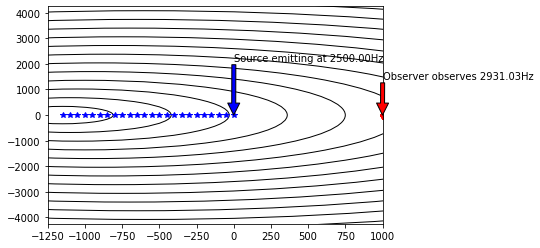

In [45]:
# Source starting at x=0 moving at 50m/s to the left
# The source is emitting a sound at a frequency of 2500Hz
# The observer is 1000m away and is stationary (v_observer=0m/s)
# We want the waves to reach the observer, so 25 seconds is a good duration
# Sound travels at about 340m/s in air
doppler(0,-50,2500,1000,0,25,340)

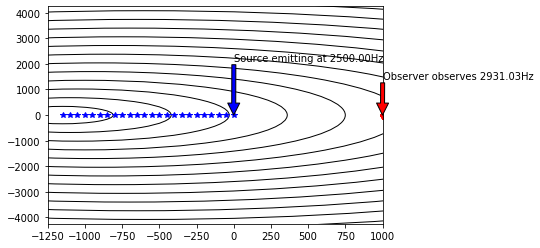

In [46]:
# Source starting at x=0 moving at 50m/s to the left
# The source is emitting a sound at a frequency of 2500Hz
# The observer is 1000m away and is stationary (v_observer=0m/s)
# We want the waves to reach the observer, so 25 seconds is a good duration
# Sound travels at about 340m/s in air
doppler(0,-50,2500,1000,0,25,340)